### Import data and pre-processing

In [2]:
# package import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re # regex to clean data

# file import
#pathstr='/Users/chrisliu/Dropbox (MIT)/01 Shared Research Folder/Pervoskite Opt for Scale-up/Stanford Experiment Data/Open Air Plasma Perovskite Devices/'
pathstr='C:\\Users\\Zhe\\Dropbox (MIT)\\01 Shared Research Folder\\Pervoskite Opt for Scale-up\\Stanford Experiment Data\\Open Air Plasma Perovskite Devices\\'
endstr='Data Summary Cleaned.csv'
sf_data=pd.read_csv(pathstr+endstr)
#remove entries with an empty field
sf_data1 = sf_data.dropna()
sf_data1.describe()

from sklearn.preprocessing import LabelEncoder
cat2label = LabelEncoder()
# convert categorical labels to numbers 
sf_data1.iloc[:,5] = cat2label.fit_transform(sf_data1['Curing source'].astype('str')) #'Curing source' 0: Air 1: None 2: plasma
sf_data1.iloc[:,9] = cat2label.fit_transform(sf_data1['Gas'].astype('str')) #'Gas' 0: Air 1: N2
sf_data1.iloc[:,11]= pd.to_numeric(sf_data1['Plasma Height (cm)'].astype('str'), errors='coerce').fillna(0).astype('float') #'Height (cm)'
sf_data1.iloc[:,12]= np.round(sf_data1['Humidity (%)']/50, 1)*50

sf_data1.iloc[:,13] = cat2label.fit_transform(sf_data1['Cs/Br Content (%)'].astype('str'))+0.17
sf_data1.iloc[:,14] = cat2label.fit_transform(sf_data1['Position (L/R)'].astype('str'))

#sf_data1 = sf_data1[sf_data1.iloc[:,9] == 0]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [3]:
# sf_data1 = sf_data1[sf_data1.iloc[:,9] == 0]
#sf_data1 = sf_data1[sf_data1['Curing source']==2]
sf_cols=sf_data.columns.values # get column names for indexing later
sf_col_vals=[] # build array of columns only of numerical columns
for n in range(22):
    # pass columns we don't care about right now
    if n==15 or n==17 or n==18 or n==19: #11 is Gas
        pass
    else: # Clean numerical columns
        sf_col_vals.append(n+1)
        print(n,'.', sf_cols[n+1])
        
        # replace #VALUE! with np.nan
        sf_data1.loc[sf_data1.iloc[:,n+1]=='#VALUE!',sf_cols[n+1]]=np.nan
        # the next line selects all NaN values, converts to string, strips "," vlaues (you can add more non-digit values to strip) then converts to a string and overwrites the non NaN values in sf_data
        # we have to skip NaN values or else converting to a string will change NaN to ""
        (sf_data1.loc[~sf_data1.iloc[:,n+1].isnull(),sf_cols[n+1]])=((sf_data1.loc[~sf_data1.iloc[:,n+1].isnull(),sf_cols[n+1]]).astype('str').replace(r",","",regex=True).astype('float'))
    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0 . Concentration (M)
1 . DMSO Amount (%)
2 . MACl Additive (%)
3 . PbI2 additive (%)
4 . Curing source
5 . Speed (mm/s)
6 . Temperature (Celsius)
7 . Spray Flow Rate (uL/min)
8 . Gas
9 . Gas Flow Rate (LPM)
10 . Plasma Height (cm)
11 . Humidity (%)
12 . Cs/Br Content (%)
13 . Position (L/R)
14 . Voc (V)
16 . Jsc (mA/cm2)
20 . Fill Factor
21 . Efficiency (%)


In [4]:
# Select important feature
corr_matrix=(sf_data1.iloc[:,sf_col_vals])
# Select efficiency range 
df = corr_matrix[corr_matrix['Efficiency (%)'] >= 0]
corr_matrix1=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17]]  
corr_matrix1.describe()



,Concentration (M),DMSO Amount (%),MACl Additive (%),PbI2 additive (%),Curing source,Speed (mm/s),Temperature (Celsius),Spray Flow Rate (uL/min),Gas,Gas Flow Rate (LPM),Plasma Height (cm),Humidity (%),Cs/Br Content (%),Voc (V),Jsc (mA/cm2),Fill Factor,Efficiency (%)
count,625.000000,625.000000,625.00000,625.00000,625.000000,625.000000,625.0000,625.000000,625.000000,625.000000,625.000000,625.00000,6.250000e+02,625.000000,625.000000,625.000000,625.000000
mean,0.207104,63.520000,3.84960,0.84800,1.540800,122.352000,148.0320,1653.680000,0.009600,46.048000,0.792720,29.66400,1.700000e-01,0.908591,18.087664,58.864968,10.098055
std,0.028775,9.456886,10.32841,2.78807,0.793816,42.306167,17.8292,520.141647,0.097586,10.232753,0.547173,7.37388,1.416668e-15,0.131648,3.374726,10.725639,3.283523
min,0.150000,50.000000,0.00000,0.00000,0.000000,60.000000,85.0000,400.000000,0.000000,20.000000,0.000000,20.00000,1.700000e-01,0.061459,0.523251,22.226400,0.028300
25%,0.200000,50.000000,0.00000,0.00000,1.000000,105.000000,140.0000,1400.000000,0.000000,50.000000,0.200000,25.00000,1.700000e-01,0.892994,17.422058,55.246200,8.402700
50%,0.200000,67.000000,0.00000,0.00000,2.000000,105.000000,150.0000,1600.000000,0.000000,50.000000,0.800000,30.00000,1.700000e-01,0.935849,18.970067,60.570700,10.860000
75%,0.200000,67.000000,0.00000,0.00000,2.000000,105.000000,160.0000,1800.000000,0.000000,50.000000,1.000000,35.00000,1.700000e-01,0.980216,19.971797,65.479900,12.453200
max,0.330000,100.000000,38.00000,10.00000,2.000000,250.000000,185.0000,3200.000000,1.000000,80.000000,3.000000,50.00000,1.700000e-01,1.120829,22.923928,79.467100,15.316700


### Train and Test Split

In [14]:
from sklearn.model_selection import train_test_split
X1=corr_matrix1.iloc[:,:-4]
y1=corr_matrix1['Efficiency (%)']
X=X1.to_numpy(dtype='float')
y=y1.to_numpy(dtype='float')
temp_x = []
temp_y = []
new_X = []
new_y = []
for idx, xi in enumerate(X):
    if len(temp_x) == 0 :
        temp_x.append(xi)
        temp_y.append(y[idx])
    elif np.all(xi == temp_x[0]):
        temp_x.append(xi)
        temp_y.append(y[idx])
    else:
        new_X.append(temp_x[0])
        new_y.append(np.max(temp_y))
        
        temp_x = [xi]
        temp_y = [y[idx]]
if len(temp_x) != 0: # append the last condition 
    new_X.append(temp_x[0])
    new_y.append(np.max(temp_y))
new_X= np.array(new_X)
new_y= np.array(new_y)

X_train,X_test,y_train,y_test=train_test_split(new_X,new_y, test_size=0.9, random_state = 10)

from sklearn.preprocessing import StandardScaler, MinMaxScaler  
Xscaler = MinMaxScaler()
Xscaler.fit(new_X)
X_train = Xscaler.transform(X_train)
X_test = Xscaler.transform(X_test)

X_scaled = Xscaler.transform(new_X)
y = new_y

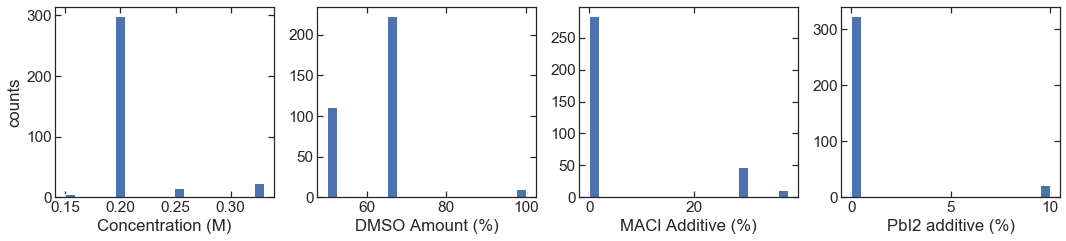

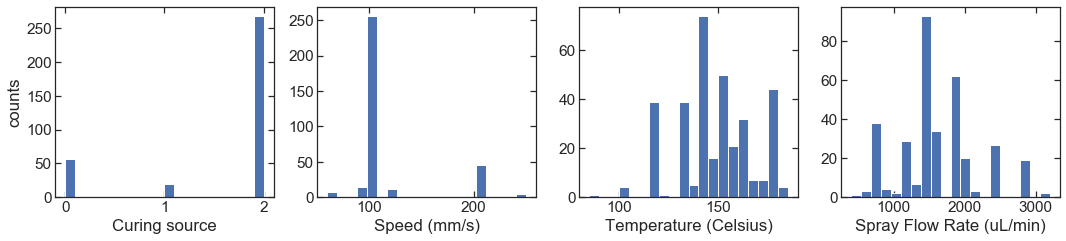

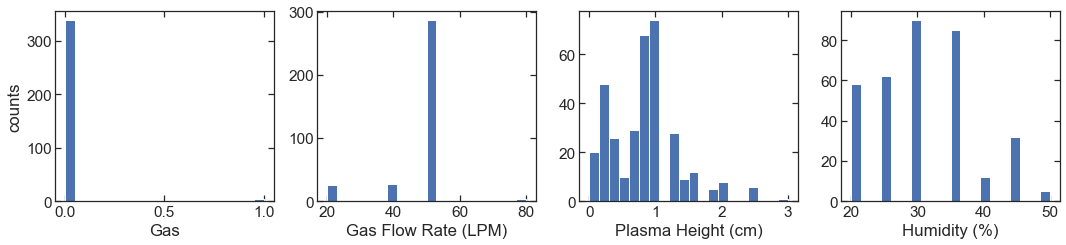

In [15]:
#visualize data distribution for selected features
X_df = pd.DataFrame(new_X, columns = X1.columns[:])

sns.set(font_scale=1.4)
sns.set_style("ticks",{'xtick.direction': 'in','ytick.direction':'in','xtick.top': True,'ytick.right': True})
n_col = 4
df_cols=X_df.columns.values # get column names for indexing later

for n in np.arange(0, 12, n_col):
        fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
        for i in np.arange(n_col):

            if n< len(df_cols):
                im = axes[i].hist(X_df.iloc[:,n], bins = 20)
                axes[i].set_xlabel(df_cols[n])
            else:
                axes[i].axis("off")
            n = n+1      
        axes[0].set_ylabel('counts')
        plt.show()

### tSNE representation of process variables

In [7]:
from sklearn.manifold import TSNE
Xtsne_2d = TSNE(n_components=2, init='random', random_state = 5, learning_rate=5, perplexity = 50, n_iter = 5000).fit_transform(X_scaled)

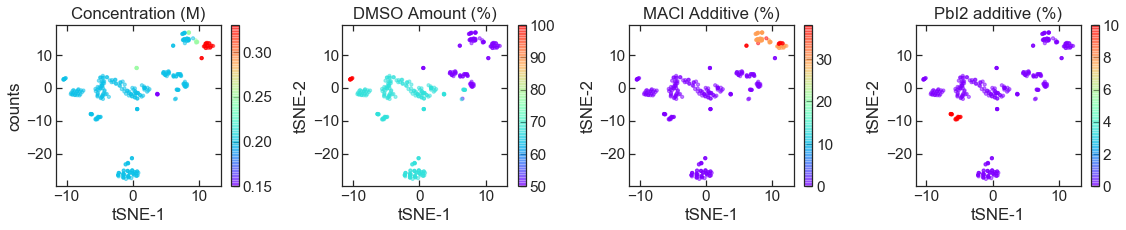

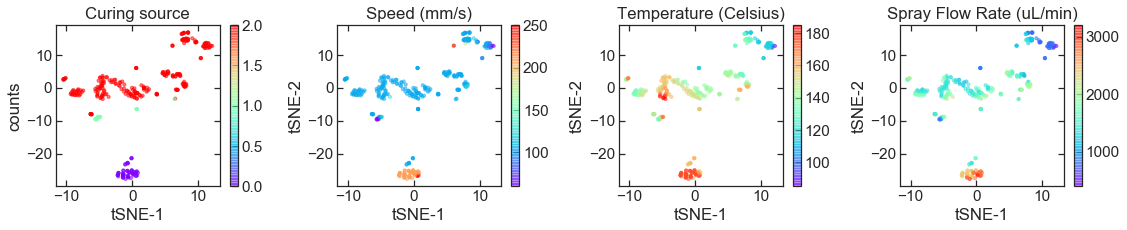

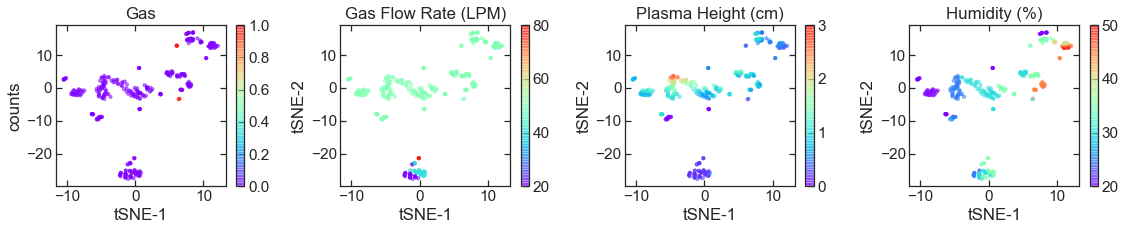

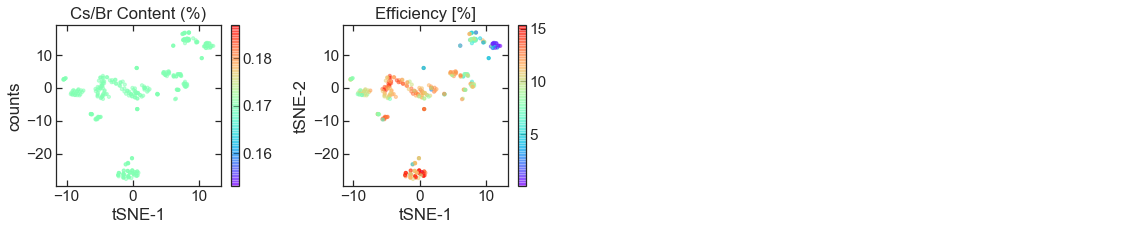

In [8]:
sns.set(font_scale=1.4)
sns.set_style("ticks",{'xtick.direction': 'in','ytick.direction':'in','xtick.top': True,'ytick.right': True})

df_cols=X_df.columns.values # get column names for indexing later

for n in np.arange(0, 15, n_col):
        fig,axes = plt.subplots(1, n_col, figsize=(16, 3.5), sharey = False)
        cmap = plt.get_cmap('rainbow', 100)
        for i in np.arange(n_col):
            if n<= len(df_cols):
                if n == len(df_cols):
                    c = new_y#(new_y>14)*
                    title = 'Efficiency [%]'
                else:                                     
                    c = new_X[:,n]
                    title = (df_cols[n])
                im = axes[i].scatter(Xtsne_2d[:,0], Xtsne_2d[:,1], 
                                 marker = 'o', c=c, 
                                 cmap=cmap, alpha =0.5, 
                                 edgecolors = 'face', s = 10)
                axes[i].set_title(''+title)
                fig.colorbar(im, ax=axes[i], drawedges=False)
                axes[i].set_xlabel('tSNE-1')
                axes[i].set_ylabel('tSNE-2')
            else:
                axes[i].axis("off")
                #axes[i].set_title(sf_cols[n])
            n = n+1      
        axes[0].set_ylabel('counts')
        fig.tight_layout()
        plt.show()

### Linear Regression 


LinearRegression


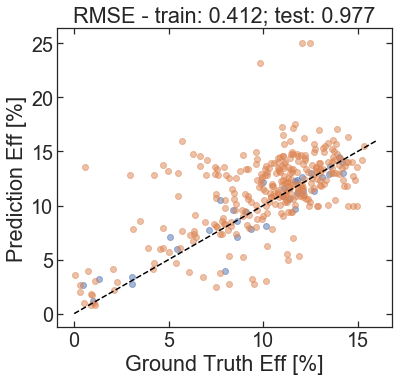

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
mse = mean_squared_error

LNR = LinearRegression() #random_state = 20
LNR.fit(X_train, y_train)
y_train_pred = LNR.predict(X_train)
y_test_pred = LNR.predict(X_test)
y_pred = LNR.predict(X_scaled)

print('LinearRegression')
sns.set(font_scale=1.8)
sns.set_style("ticks",{'xtick.direction': 'in','ytick.direction':'in','xtick.top': True,'ytick.right': True})
fig,axes = plt.subplots(1, 1, figsize=(6, 5.5), sharey = False)
axes.scatter(y_train,y_train_pred, alpha = 0.5)
axes.scatter(y_test,y_test_pred, alpha = 0.5)
yref = np.arange(0, max([max(y_train),max(y_test)])*1.05, 0.1)
axes.plot(yref, yref, '--', color='black')
axes.set_xlabel('Ground Truth Eff [%]')
axes.set_ylabel('Prediction Eff [%]')

mse_train = mse(y_train_pred,y_train)
mse_test = mse(y_test_pred,y_test)
axes.set_title('RMSE - '+'train: %.3f' % (np.sqrt(mse_train)/np.std(new_y))+'; '+'test: %.3f' % (np.sqrt(mse_test)/np.std(new_y))) 
plt.show()

### Gradient Boosting

GradientBoostingRegressor


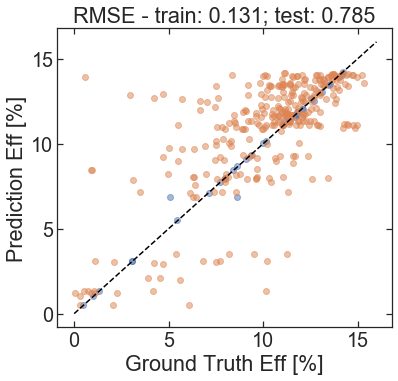

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
mse = mean_squared_error

GBR = GradientBoostingRegressor(n_estimators = 50, max_depth = 5) #random_state = 20
GBR.fit(X_train, y_train)
y_train_pred = GBR.predict(X_train)
y_test_pred = GBR.predict(X_test)
y_pred = GBR.predict(X_scaled)

print('GradientBoostingRegressor')

sns.set(font_scale=1.8)
sns.set_style("ticks",{'xtick.direction': 'in','ytick.direction':'in','xtick.top': True,'ytick.right': True})
fig,axes = plt.subplots(1, 1, figsize=(6, 5.5), sharey = False)
axes.scatter(y_train,y_train_pred, alpha = 0.5)
axes.scatter(y_test,y_test_pred,  alpha = 0.5)
yref = np.arange(0, max([max(y_train),max(y_test)])*1.05, 0.1)
axes.plot(yref, yref, '--', color='black')
axes.set_xlabel('Ground Truth Eff [%]')
axes.set_ylabel('Prediction Eff [%]')

mse_train = mse(y_train_pred,y_train)
mse_test = mse(y_test_pred,y_test)
axes.set_title('RMSE - '+'train: %.3f' % (np.sqrt(mse_train)/np.std(new_y))+'; '+'test: %.3f' % (np.sqrt(mse_test)/np.std(new_y))) 
plt.show()

### Random Forest 

RandomForestRegressor


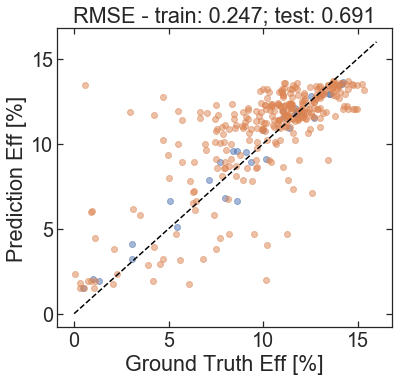

In [11]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error

RFR = RandomForestRegressor(n_estimators = 1000, max_depth = 7) #random_state = 20
RFR.fit(X_train, y_train)
y_train_pred = RFR.predict(X_train)
y_test_pred = RFR.predict(X_test)
y_pred = RFR.predict(X_scaled)

print('RandomForestRegressor')
sns.set(font_scale=1.8)
sns.set_style("ticks",{'xtick.direction': 'in','ytick.direction':'in','xtick.top': True,'ytick.right': True})
fig,axes = plt.subplots(1, 1, figsize=(6, 5.5), sharey = False)
axes.scatter(y_train,y_train_pred, alpha = 0.5)
axes.scatter(y_test,y_test_pred, alpha = 0.5)
yref = np.arange(0, max([max(y_train),max(y_test)])*1.05, 0.1)
axes.plot(yref, yref, '--', color='black')
axes.set_xlabel('Ground Truth Eff [%]')
axes.set_ylabel('Prediction Eff [%]')

mse_train = mse(y_train_pred,y_train)
mse_test = mse(y_test_pred,y_test)
axes.set_title('RMSE - '+'train: %.3f' % (np.sqrt(mse_train)/np.std(new_y))+'; '+'test: %.3f' % (np.sqrt(mse_test)/np.std(new_y))) 
plt.show()

### Run a Search 

In [16]:
initial_num = 50
in_train = np.zeros(len(X_scaled), dtype=np.bool)
#in_train[np.random.choice(len(X_scaled), initial_num, replace=False)] = True
in_train[:initial_num] = True
#in_train[np.argsort(y)[:10]] = True
print('Picked {} training entries'.format(in_train.sum()))
print('Max efficiency of the initial', len(y[in_train]), 'training entries: ', np.max(y[in_train]), '%')

assert not np.isclose(np.max(y), np.max(y[in_train]))

Picked 50 training entries
Max efficiency of the initial 50 training entries:  11.9093 %


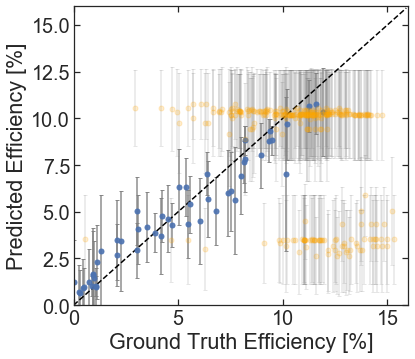

In [22]:
model_SKRF = SKRFRegressor(n_estimators=1000)
model_SKRF.fit(X_scaled[in_train], y[in_train])
# skrf_pred_train = model_SKRF.predict(X_train)
# skrf_pred_test = model_SKRF.predict(X_test)
skrf_init = [est.predict(X_scaled[in_train]) for est in model_SKRF.estimators_]
y_pred_init = np.mean(skrf_init, axis = 0)
y_std_init = np.std(skrf_init , axis = 0)

skrf_others = [est.predict(X_scaled[~in_train]) for est in model_SKRF.estimators_]
y_pred_others = np.mean(skrf_others, axis = 0)
y_std_others = np.std(skrf_others , axis = 0)


sns.set(font_scale=1.8)
sns.set_style("ticks",{'xtick.direction': 'in','ytick.direction':'in','xtick.top': True,'ytick.right': True})
plt.figure(figsize =(6, 5.5))
plt.errorbar(y[in_train], y_pred_init, y_std_init, fmt='o', ms=5, ecolor='gray', alpha = 0.9, capsize = 2)
plt.errorbar(y[~in_train], y_pred_others, y_std_others, fmt='o', ms=5, c = 'orange', 
             ecolor='gray', alpha = 0.2, capsize = 2)

plt.plot(np.arange(0, 16, 0.1), np.arange(0, 16, 0.1), '--', c = 'black')
plt.xlabel('Ground Truth Efficiency [%]')
plt.ylabel('Predicted Efficiency [%]')
plt.xlim(0, 16)
plt.ylim(0, 16)
plt.show()

In [17]:
batch_size = 10
max_n_steps = int((len(y)-initial_num)/batch_size)
n_steps = max_n_steps
all_inds = set(range(len(y)))
target_value = max(y)

In [18]:
from sklearn.ensemble import RandomForestRegressor as SKRFRegressor
print('The number of intitial samples is:', initial_num, '; Batch size:', batch_size, '; Regression Method: SK-RF.')
from scipy.stats import norm
for x in range(1):
    ei_train = [set(np.where(in_train)[0].tolist())]
    ei_ypred = [] #list(y[in_train])
    ei_search_ind = np.where(in_train)[0].tolist()
    model_SKRF = SKRFRegressor(n_estimators=1000)
    for n in range(n_steps):
        # Get the current train set and search space
        train_inds = sorted(set(ei_train[-1]))  # Last iteration
        search_inds = sorted(all_inds.difference(train_inds))
        # Pick entry with the largest maximum value
        model_SKRF.fit(X_scaled[train_inds], y[train_inds])
        skrf_search = [est.predict(X_scaled[search_inds]) for est in model_SKRF.estimators_]
        y_pred = np.mean(skrf_search, axis = 0)
        y_std = np.std(skrf_search , axis = 0)
        epsilon = 0 #1.0 - n*(0.02)
        Z = np.divide(y_pred - np.max(y[train_inds]) - epsilon, y_std)
        ei_metric = (y_pred - np.max(y[train_inds])-epsilon)*norm.cdf(Z)+ y_std*norm.pdf(Z)
        ei_metric[y_std == 0] = 0
        new_batch = np.argsort(ei_metric)[-batch_size:]
        # Add it to the list of training sets
        new_batch_indx = [search_inds[i] for i in new_batch]
        train_inds.extend(new_batch_indx)
        ei_train.append(set(train_inds))
        ei_search_ind.extend(new_batch_indx)
        ei_ypred.extend([[y_pred[i], y_std[i], y[search_inds[i]]] for i in new_batch])

        if np.max(y[list(train_inds)])>=target_value:
            print("EI Method Found the Highest Efficiency Point after ", len(list(train_inds)), 'Samples')
            break

The number of intitial samples is: 50 ; Batch size: 10 ; Regression Method: SK-RF.
EI Method Found the Highest Efficiency Point after  160 Samples


The number of intitial samples is: 50 ; Batch size: 10 ; Regression Method: SK-RF.


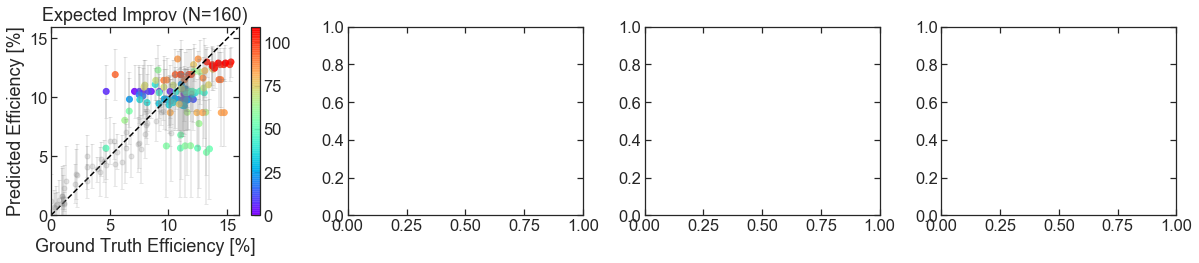

In [23]:
print('The number of intitial samples is:', initial_num, '; Batch size:', batch_size, '; Regression Method: SK-RF.')

sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in','ytick.direction':'in','xtick.top': True,'ytick.right': True})
i = 0
fig, axes = plt.subplots(1,4,figsize=(17, 4))
for ypred, label in zip([ei_ypred], 
                        ['Expected Improv']):
    ypred_rounds, ystd_rounds, y_rounds = np.transpose(np.round(ypred, 2))

    cmap = plt.get_cmap('rainbow', 100)
    axes[i].errorbar(y_rounds, ypred_rounds, ystd_rounds, fmt = 'o', ms=0, ecolor = 'gray', alpha =0.2 ,capsize = 2)
    axes[i].plot(np.arange(0, 16, 0.1), np.arange(0, 16, 0.1), '--', c = 'black')
    axes[i].errorbar(y[in_train], y_pred_init, y_std_init, fmt = 'o', ms=5, c = 'gray', ecolor = 'gray', alpha =0.2 ,capsize = 2)
    im = axes[i].scatter(y_rounds, ypred_rounds, marker = 'o', c= np.arange(len(y_rounds)), cmap=cmap, alpha =0.9, edgecolors = 'face')

    fig.colorbar(im, ax=axes[i], drawedges=False)
    axes[i].set_xticks(np.arange(0, 16, 5))
    axes[i].set_ylabel('Predicted Efficiency [%]')
    axes[i].set_yticks(np.arange(0, 16, 5))
    axes[i].set_xlabel('Ground Truth Efficiency [%]')
    axes[i].set_xlim(0, 16)
    axes[i].set_ylim(0, 16)
    axes[i].set_title(label+' (N='+str(len(y_rounds)+initial_num)+')', fontsize=18)
    i +=1
fig.tight_layout()
plt.show()

The number of intitial samples is: 50 ; Batch size: 10 ; Regression Method: SK-RF.


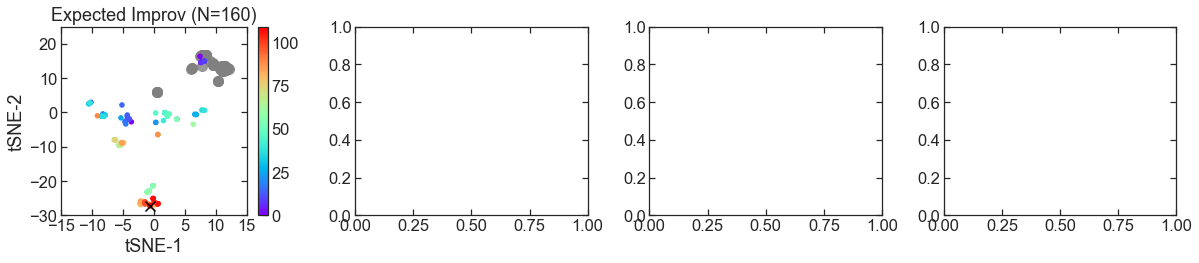

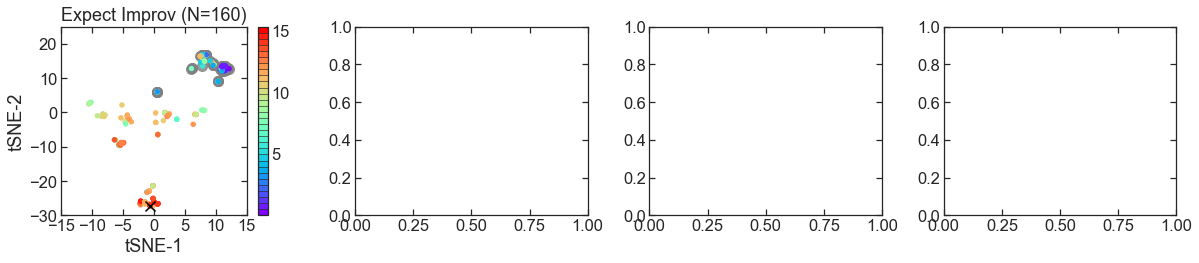

In [26]:
print('The number of intitial samples is:', initial_num, '; Batch size:', batch_size, '; Regression Method: SK-RF.')
sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in','ytick.direction':'in','xtick.top': True,'ytick.right': True})
i = 0
fig, axes = plt.subplots(1,4,figsize=(17, 4))
for train_ind, label in zip([ei_search_ind], 
                             ['Expected Improv']):
    search_ind = np.array(train_ind)[initial_num:]
    tsne_sorted = np.array([Xtsne_2d[i] for i in search_ind])
    cmap = plt.get_cmap('rainbow', 100)
    axes[i].scatter(Xtsne_2d[in_train][:,0], Xtsne_2d[in_train][:,1], c = 'gray', edgecolor = 'face', alpha =0.8, s = 100)

    im = axes[i].scatter(tsne_sorted[:,0], tsne_sorted[:,1], marker = 'o', c= np.arange(len(tsne_sorted)), cmap=cmap, alpha =1, edgecolors = 'face', s = 20)
    axes[i].scatter(tsne_sorted[-1,0], tsne_sorted[-1,1], c = 'black', edgecolor = 'face', alpha =1, s = 100, marker ='x')

    fig.colorbar(im, ax=axes[i], drawedges=False)
    axes[i].set_xticks(np.arange(-15, 16, 5))
    axes[i].set_ylabel('tSNE-2')
    axes[i].set_yticks(np.arange(-30, 21, 10))
    axes[i].set_xlabel('tSNE-1')
    axes[i].set_xlim(-15, 15)
    axes[i].set_ylim(-30, 25)
    axes[i].set_title(label+' (N='+str(len(tsne_sorted)+initial_num)+')', fontsize=18)
    i +=1
fig.tight_layout()
plt.show()


sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in','ytick.direction':'in','xtick.top': True,'ytick.right': True})
i = 0
fig, axes = plt.subplots(1,4,figsize=(17, 4))
for train_ind, label in zip([ei_search_ind], 
                             ['Expect Improv']):
    search_ind = np.array(train_ind)
    tsne_sorted = np.array([Xtsne_2d[i] for i in search_ind])
    y_sorted = np.array([y[i] for i in search_ind])

    cmap = plt.get_cmap('rainbow', 31)
    axes[i].scatter(Xtsne_2d[in_train][:,0], Xtsne_2d[in_train][:,1], c = 'gray', edgecolor = 'face', alpha =0.8, s = 100)
    im = axes[i].scatter(tsne_sorted[:,0], tsne_sorted[:,1], marker = 'o', c= y_sorted, cmap=cmap, alpha =1, edgecolors = 'face', s = 20)
    axes[i].scatter(tsne_sorted[-1,0], tsne_sorted[-1,1], c = 'black', edgecolor = 'face', alpha =1, s = 100, marker ='x')

    fig.colorbar(im, ax=axes[i], drawedges=True)
    axes[i].set_xticks(np.arange(-15, 16, 5))
    axes[i].set_ylabel('tSNE-2')
    axes[i].set_yticks(np.arange(-30, 21, 10))
    axes[i].set_xlabel('tSNE-1')
    axes[i].set_xlim(-15, 15)
    axes[i].set_ylim(-30, 25)
    axes[i].set_title(label+' (N='+str(len(tsne_sorted))+')', fontsize=18)
    i +=1
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

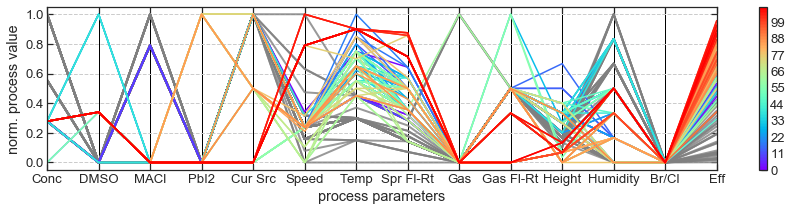

In [30]:
# libraries
import matplotlib.pyplot as plt
import matplotlib.cm     as cm
sns.set(font_scale=1.2)
sns.set_style("ticks",{'xtick.direction': 'in','ytick.direction':'in','xtick.top': True,'ytick.right': True})
#[mei_search_ind, mu_search_ind, mli_search_ind]
data = np.concatenate([X_scaled, np.transpose([y/16])], axis = 1)
labels= ['Conc', 'DMSO', 'MACl',
         'PbI2', 'Cur Src', 'Speed',
         'Temp', 'Spr Fl-Rt', 'Gas',
         'Gas Fl-Rt', 'Height', 'Humidity', 'Br/Cl',
         'Eff']

init_ind = ei_search_ind[:initial_num]
search_ind = ei_search_ind[initial_num:]
# i = 0
# fig, axes = plt.subplots(1,3,figsize=(16, 4.5))
# for train_ind, label in zip([mei_search_ind, mu_search_ind, mli_search_ind], 
#                              [ 'Max Expect Improv', 'Max Uncertainty', 'Max Likelhd of Improv']):
for train_ind, label in zip([ei_search_ind], 
                              ['Expected Improv']):

    init_ind = train_ind[:initial_num]
    search_ind = train_ind[initial_num:]
    cmap = plt.get_cmap('rainbow', len(search_ind))
    Z = [[0,0],[0,0]]
    levels = range(len(search_ind))
    cb = plt.contourf(Z, levels, cmap=cmap)
    plt.clf()
    fig, ax = plt.subplots(figsize = (15, 3))
    for i in range(len(init_ind)):
        ax.plot(labels, data[init_ind[i]], color="gray", linewidth=2, alpha =0.8)
    for i in range(len(search_ind)):
        im = ax.plot(labels, data[search_ind[i]], color=cmap(i), alpha =1)

    #fig.colorbar(im, ax=ax, drawedges=True)
    ax.set_xlim(0, len(labels)-1)  # decreasing time
    ax.set_xlabel('process parameters')
    ax.set_ylabel('norm. process value')
    #ax.set_title(' ')
    ax.grid(True, axis='x', linestyle='-', linewidth=1, color= 'black')
    ax.grid(True, axis='y', linestyle='--', linewidth=1)
    plt.colorbar(cb, drawedges=False)
    plt.show()